# Big Mart Sales Prediction

In [1]:
from IPython.display import Image
Image(url= "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/Comp-4.jpg")

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

Dataset file: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

Score: 1209.76662172306

The best worldwide score of this practice is 1127.7174512567 (less is better)

### Data Dictionary
- Item_Identifier:	Unique product ID
- Item_Weight:	Weight of product
- Item_Fat_Content:	Whether the product is low fat or not
- Item_Visibility:	The % of total display area of all products in a store allocated to the particular product
- Item_Type:	The category to which the product belongs
- Item_MRP:	Maximum Retail Price (list price) of the product
- Outlet_Identifier:	Unique store ID
- Outlet_Establishment_Year:	The year in which store was established
- Outlet_Size:	The size of the store in terms of ground area covered
- Outlet_Location_Type:	The type of city in which the store is located
- Outlet_Type:	Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales:	Sales of the product in the particular store. This is the outcome variable to be predicted.

## 1. Import the data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [1]:
print("Hello World")

Hello World


In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

## 2. Data Exploration

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.shape

(8523, 12)

There are 8523 rows and 12 columns in train dataset.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

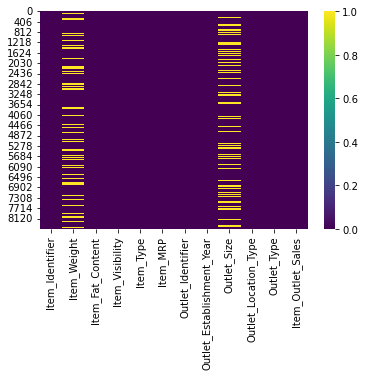

In [8]:
sns.heatmap(train.isnull(),cmap = 'viridis')
plt.show()

In [9]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [10]:
test.shape

(5681, 11)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [12]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

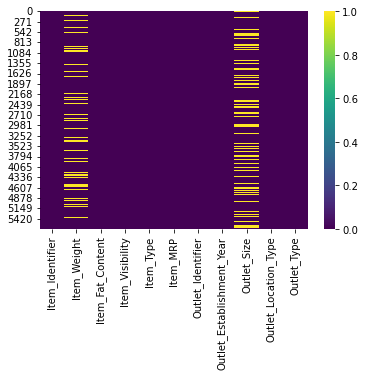

In [13]:
sns.heatmap(test.isnull(),cmap = 'viridis')
plt.show()

### 2.1 Handling missing values

train dataset

In [14]:
# mean value of "Item_Weight" column
train['Item_Weight'].mean()

12.857645184136183

In [15]:
# filling the missing values in "Item_weight column" with "Mean" value
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [16]:
# mode value of "Outlet_Size" column aggregate with "Outlet_Type"
mode_of_Outlet_size_train = train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()))

In [17]:
print(mode_of_Outlet_size_train)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [18]:
# filling the missing values in "Outlet_Size column" with "Mode" value
train['Outlet_Size'] = train['Outlet_Size'].fillna(train.loc[train.Outlet_Size.isnull(),'Outlet_Type'].apply(lambda x: mode_of_Outlet_size_train[x][0]))

In [19]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

test dataset

In [20]:
# mean value of "Item_Weight" column
test['Item_Weight'].mean()

12.695633368756374

In [21]:
# filling the missing values in "Item_weight column" with "Mean" value
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [22]:
# mode value of "Outlet_Size" column aggregate with "Outlet_Type"
mode_of_Outlet_size_test = test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()))

In [23]:
print(mode_of_Outlet_size_test)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [24]:
# filling the missing values in "Outlet_Size column" with "Mode" value
test['Outlet_Size'] = test['Outlet_Size'].fillna(test.loc[test.Outlet_Size.isnull(),'Outlet_Type'].apply(lambda x: mode_of_Outlet_size_test[x][0]))

In [25]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### 2.2 Cleaning the data
- Item_Fat_Content

train dataset

In [26]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

In [29]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

test dataset

In [30]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [31]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

In [32]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

## 3. Exploratory Data Analysis

In [33]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
sns.set()

### 3.1 Item Weight	

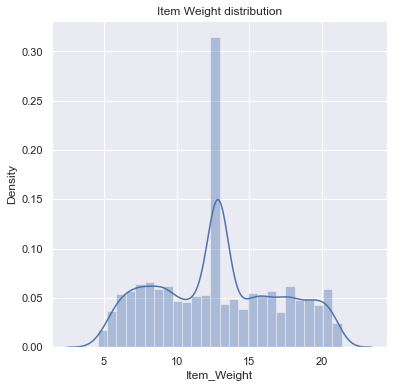

In [35]:
plt.figure(figsize = (6,6))
sns.distplot(train['Item_Weight'])
plt.title('Item Weight distribution')
plt.show()

- The distribution seems **bell shaped** with **multimodal** distribution.
- The amount of the item has weight around **12-13**. 

### 3.2 Item Fat Content

In [36]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

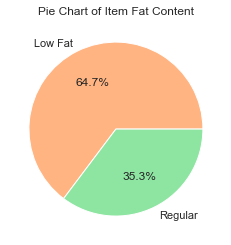

In [37]:
labels = ['Low Fat','Regular']
colors = sns.color_palette('pastel')[1:5]
plt.pie(train['Item_Fat_Content'].value_counts(), labels=labels, autopct="%.1f%%", colors=colors)
plt.title('Pie Chart of Item Fat Content')
plt.show()

There are **64.7% Low Fat** item and **35.3% Regular** item.

### 3.3 Item Visibility

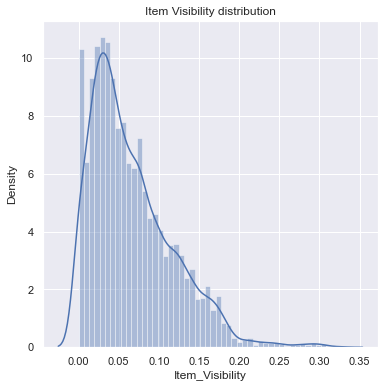

In [38]:
plt.figure(figsize = (6,6))
sns.distplot(train['Item_Visibility'])
plt.title('Item Visibility distribution')
plt.show()

- The distribution seems **right skewed** with **unimodal** distribution.

### 3.4 Item_Type

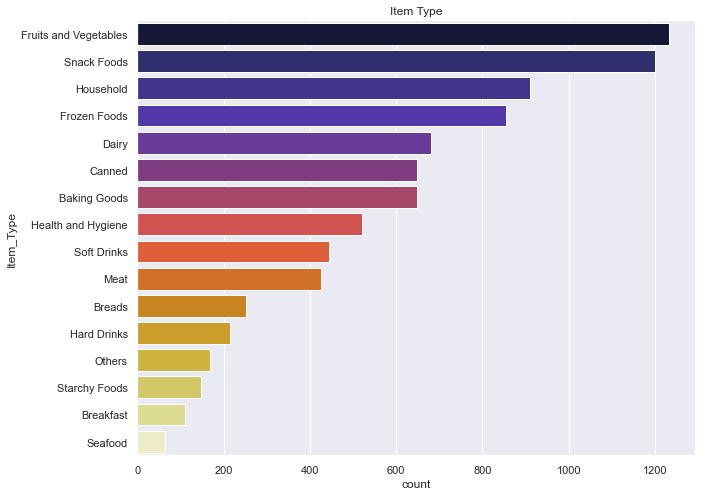

In [39]:
plt.figure(figsize = (10,8))
sns.countplot(y = 'Item_Type' ,data = train, order = train['Item_Type'].value_counts().index[0:], palette="CMRmap")
plt.title('Item Type')
plt.show()

The top 3 of Item types are **Fruits and Vegetables**, **Snack Foos** and **Household** respectively.

### Mean of Item Visibility of each Item

In [40]:
mean_Item_Visibility = train.groupby('Item_Type')['Item_Visibility'].mean().sort_values(ascending=False)

In [41]:
mean_Item_Visibility

Item_Type
Breakfast                0.085723
Seafood                  0.074976
Dairy                    0.072427
Baking Goods             0.069169
Fruits and Vegetables    0.068513
Canned                   0.068129
Starchy Foods            0.067564
Snack Foods              0.066850
Breads                   0.066255
Frozen Foods             0.065645
Hard Drinks              0.064943
Soft Drinks              0.063972
Meat                     0.062284
Household                0.061322
Others                   0.060241
Health and Hygiene       0.055216
Name: Item_Visibility, dtype: float64

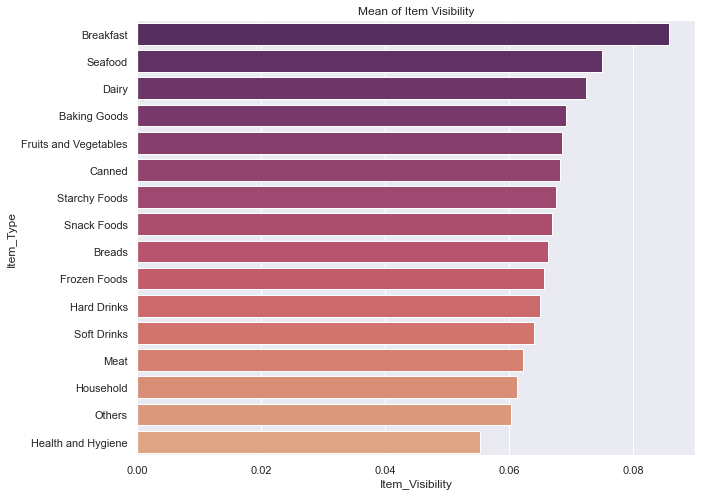

In [42]:
plt.figure(figsize = (10,8))
sns.barplot(x = mean_Item_Visibility, y = mean_Item_Visibility.index, data = train, palette = "flare_r")
plt.title('Mean of Item Visibility')
plt.show()

 - Health and Hygiene is the **lowest** mean item visibility of all products at **5.5216%**.
 - Breakfast is the **highest** mean item visibility of all products at **8.5723%**.

### 3.5 Item_MRP

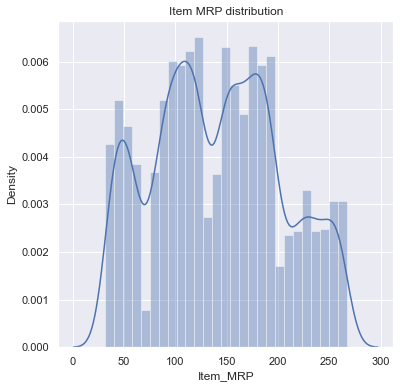

In [43]:
plt.figure(figsize = (6,6))
sns.distplot(train['Item_MRP'])
plt.title('Item MRP distribution')
plt.show()

The curve looks weid with multimodal distribution.

### Mean of Item MRP of each Item

In [44]:
mean_Item_MRP = train.groupby('Item_Type')['Item_MRP'].mean().sort_values(ascending=False)

In [45]:
mean_Item_MRP

Item_Type
Household                149.424753
Dairy                    148.499208
Starchy Foods            147.838023
Snack Foods              146.194934
Fruits and Vegetables    144.581235
Seafood                  141.841719
Breakfast                141.788151
Breads                   140.952669
Meat                     139.882032
Canned                   139.763832
Frozen Foods             138.503366
Hard Drinks              137.077928
Others                   132.851430
Soft Drinks              131.492506
Health and Hygiene       130.818921
Baking Goods             126.380766
Name: Item_MRP, dtype: float64

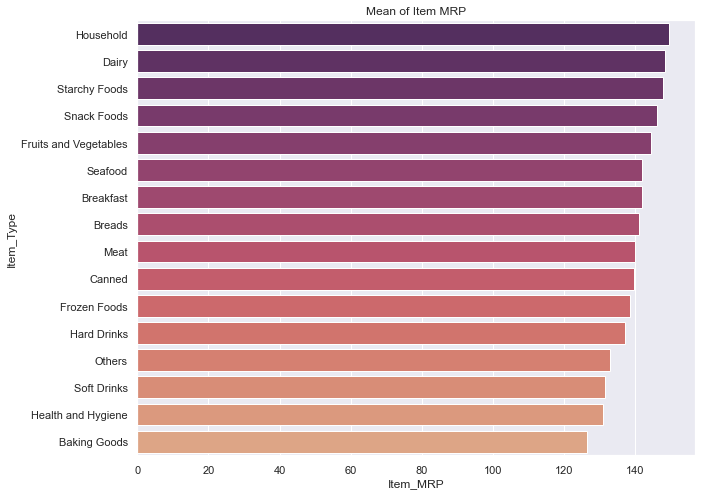

In [46]:
plt.figure(figsize = (10,8))
sns.barplot(x = mean_Item_MRP, y = mean_Item_MRP.index, data = train, palette = "flare_r")
plt.title('Mean of Item MRP')
plt.show()

The mean of Item MRP is closely around 125-150.
 - Baking Goods is the **lowest** mean item mrp of all products at **126.380766**.
 - Household  is the **highest** mean item mrp of all products at **149.424753**.

### 3.6 Outlet_Establishment_Year

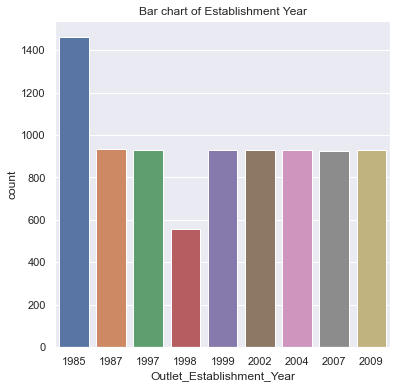

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data = train)
plt.title('Bar chart of Establishment Year')
plt.show()

- The **most** product is in outlet that established at **1985**.
- The **least** product is in outlet that established at **1998**.

### 3.7 Outlet_Size

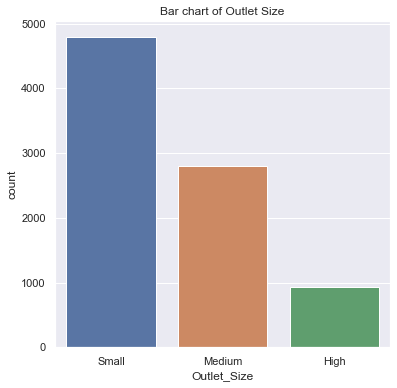

In [48]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Outlet_Size', data = train, order = ['Small','Medium','High'])
plt.title('Bar chart of Outlet Size')
plt.show()

They established the largest number of small size and the smallest of high size.

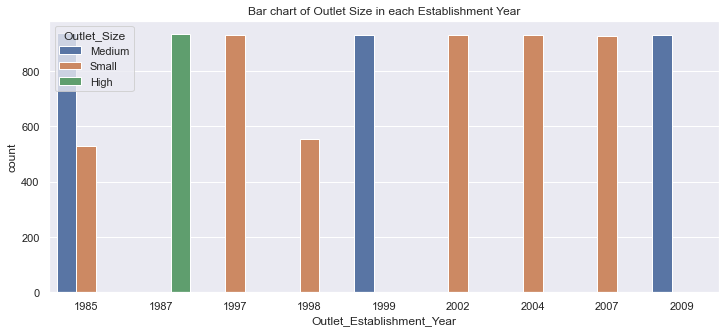

In [49]:
plt.figure(figsize=(12,5))
sns.countplot(x = 'Outlet_Establishment_Year', hue = 'Outlet_Size', data = train)
plt.title('Bar chart of Outlet Size in each Establishment Year')
plt.show()

As we can see, they established high size at only 1 year,1987, medium size at 3 years and small size at 6 years.

### 3.8 Outlet_Location_Type

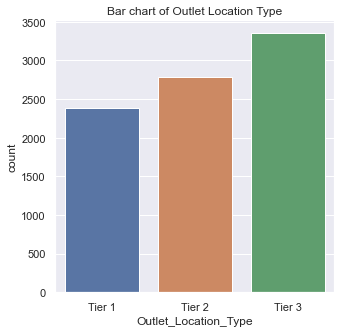

In [50]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'Outlet_Location_Type', data = train, order = ['Tier 1','Tier 2','Tier 3'])
plt.title('Bar chart of Outlet Location Type')
plt.show()

### 3.9 Outlet_Type

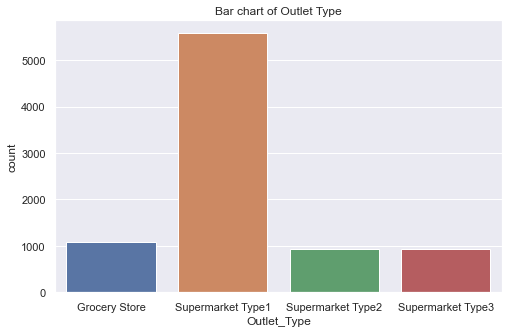

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Outlet_Type', data = train, order = ['Grocery Store','Supermarket Type1','Supermarket Type2', 'Supermarket Type3'])
plt.title('Bar chart of Outlet Type')
plt.show()

Almost of the products is in **Supermarket Type1**.

### Outlet Size in each Location Type

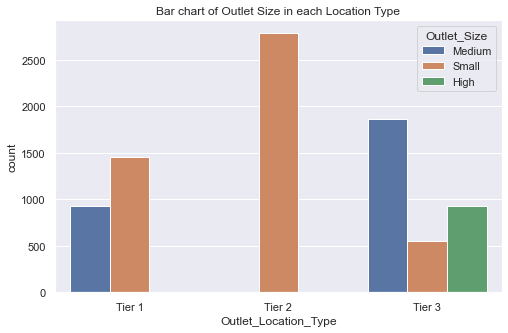

In [52]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Outlet_Location_Type', hue = 'Outlet_Size', data = train, order = ['Tier 1','Tier 2','Tier 3'])
plt.title('Bar chart of Outlet Size in each Location Type')
plt.show()

- Location **Tier 1** has both **medium** and **small** size.
- Location **Tier 2** has only **small** size.
- Location **Tier 3** has **all** size.

### Outlet Size in each Type

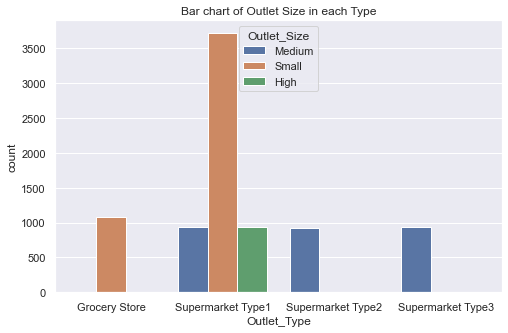

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Outlet_Type', hue = 'Outlet_Size', data = train, order = ['Grocery Store','Supermarket Type1','Supermarket Type2', 'Supermarket Type3'])
plt.title('Bar chart of Outlet Size in each Type')
plt.show()

- Only **Supermarket Type1** has **3 size** of outlet,while **others** has just **1 size**.
- As **Supermarket Type1**, most of products are in **small size**.

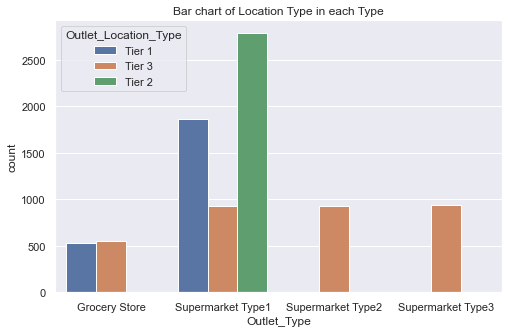

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Outlet_Type', hue = 'Outlet_Location_Type', data = train, order = ['Grocery Store','Supermarket Type1','Supermarket Type2', 'Supermarket Type3'])
plt.title('Bar chart of Location Type in each Type')
plt.show()

- Both **Supermarket Type2 and 3** was located only 1 location that is **Tier 1**, while others was located more than 1 locations.
- As **Supermarket Type1**, most of products are in **Tier 2**.

### 3.10 Item_Outlet_Sales

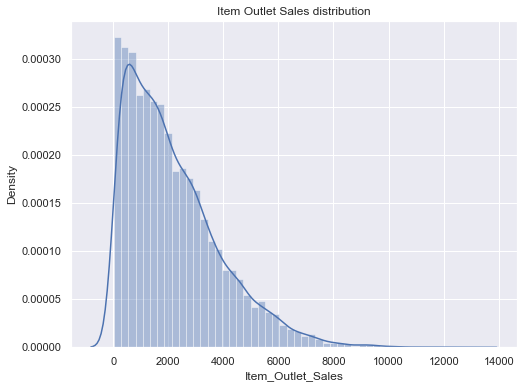

In [55]:
plt.figure(figsize = (8,6))
sns.distplot(train['Item_Outlet_Sales'])
plt.title('Item Outlet Sales distribution')
plt.show()

- The distribution seems **right skewed** with **unimodal** distribution.

## 4. Data Pre-Processing

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Train Dataset

In [57]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Label Encoding

In [58]:
encoder = LabelEncoder()

In [59]:
train['Item_Fat_Content'] = encoder.fit_transform(train['Item_Fat_Content'])

train['Item_Type'] = encoder.fit_transform(train['Item_Type'])

train['Outlet_Size'] = encoder.fit_transform(train['Outlet_Size'])

train['Outlet_Location_Type'] = encoder.fit_transform(train['Outlet_Location_Type'])

train['Outlet_Type'] = encoder.fit_transform(train['Outlet_Type'])

Drop Data

In [60]:
train = train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [61]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


#### Test Dataset

In [62]:
# Duplicate test dataset
test_copy = test.copy()

Label Encoding

In [63]:
encoder = LabelEncoder()

In [64]:
test['Item_Fat_Content'] = encoder.fit_transform(test['Item_Fat_Content'])

test['Item_Type'] = encoder.fit_transform(test['Item_Type'])

test['Outlet_Size'] = encoder.fit_transform(test['Outlet_Size'])

test['Outlet_Location_Type'] = encoder.fit_transform(test['Outlet_Location_Type'])

test['Outlet_Type'] = encoder.fit_transform(test['Outlet_Type'])

Drop Data

In [65]:
test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [66]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2007,2,1,1
2,14.600000,0,0.099575,11,241.7538,1998,2,2,0
3,7.315000,0,0.015388,13,155.0340,2007,2,1,1
4,12.695633,1,0.118599,4,234.2300,1985,1,2,3


#### Importing data

In [67]:
X = train.drop('Item_Outlet_Sales',axis=1)

In [68]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,1999,1,0,1
1,5.92,1,0.019278,14,48.2692,2009,1,2,2
2,17.50,0,0.016760,10,141.6180,1999,1,0,1
3,19.20,1,0.000000,6,182.0950,1998,2,2,0
4,8.93,0,0.000000,9,53.8614,1987,0,2,1


In [69]:
Y = train['Item_Outlet_Sales']

In [70]:
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

#### Splitting the dataset into Training set and Test set

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [72]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6404,12.857645,0,0.008722,6,123.5414,1985,1,2,3
5820,18.700000,0,0.014623,14,52.0324,2002,2,1,1
48,15.850000,1,0.121633,0,60.6220,1997,2,0,1
4583,12.857645,0,0.145670,5,247.2776,1985,2,0,0
3791,21.000000,0,0.049296,13,194.4478,2004,2,1,1


In [73]:
X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4931,14.500000,0,0.089960,8,159.5604,2002,2,1,1
4148,12.857645,0,0.009535,13,64.5510,1985,1,2,3
7423,11.500000,0,0.017742,8,129.6626,2007,2,1,1
4836,10.195000,0,0.000000,5,143.1154,2007,2,1,1
944,21.000000,0,0.049264,13,195.0478,1987,0,2,1


## 5. Modelling

In [74]:
# Importing Regression Modules
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### 5.1 Multiple Linear Regression

In [75]:
mlr = LinearRegression()
mlr.fit(X_train, Y_train)

LinearRegression()

In [76]:
# prediction on training data
training_data_prediction = mlr.predict(X_train)

In [77]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [78]:
print('R Squared value = ', r2_train)

R Squared value =  0.5005162337610845


In [79]:
# prediction on test data
test_data_prediction = mlr.predict(X_test)

In [80]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [81]:
print('R Squared value = ', r2_test)

R Squared value =  0.5056928143709671


### 5.2 Support Vector Regression

In [82]:
svm = SVR(kernel = 'rbf')
svm.fit(X_train, Y_train)

SVR()

In [83]:
# prediction on training data
training_data_prediction = svm.predict(X_train)

In [84]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [85]:
print('R Squared value = ', r2_train)

R Squared value =  -0.046542960118989285


In [86]:
# prediction on test data
test_data_prediction = svm.predict(X_test)

In [87]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [88]:
print('R Squared value = ', r2_test)

R Squared value =  -0.04935634052161597


### 5.3 Decision Tree Regression

In [89]:
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [90]:
# prediction on training data
training_data_prediction = dt.predict(X_train)

In [91]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [92]:
print('R Squared value = ', r2_train)

R Squared value =  1.0


In [93]:
# prediction on test data
test_data_prediction = dt.predict(X_test)

In [94]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [95]:
print('R Squared value = ', r2_test)

R Squared value =  0.14385025274671936


### 5.4 Random Forest Regression

In [96]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [97]:
# prediction on training data
training_data_prediction = rf.predict(X_train)

In [98]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [99]:
print('R Squared value = ', r2_train)

R Squared value =  0.9373890525206382


In [100]:
# prediction on test data
test_data_prediction = rf.predict(X_test)

In [101]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [102]:
print('R Squared value = ', r2_test)

R Squared value =  0.5521342727180152


Thus, Random Forest Regression is the most fit model of this project.

## 6. Testing

In [103]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2007,2,1,1
2,14.600000,0,0.099575,11,241.7538,1998,2,2,0
3,7.315000,0,0.015388,13,155.0340,2007,2,1,1
4,12.695633,1,0.118599,4,234.2300,1985,1,2,3


In [104]:
prediction = rf.predict(test)
submission = pd.DataFrame({
    'Item_Identifier':test_copy['Item_Identifier'],
    'Outlet_Identifier':test_copy['Outlet_Identifier'],
    'Item_Outlet_Sales':prediction})

In [105]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1724.248892
1,FDW14,OUT017,1269.214540
2,NCN55,OUT010,644.993750
3,FDQ58,OUT017,2292.828776
4,FDY38,OUT027,6338.349420


In [ ]:
submission.to_csv('submission.csv', index=False)